<a href="https://colab.research.google.com/github/amilliongoals/Customer-Service-Query-AI/blob/main/Cleaned_Customer_Service_Query_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Full procedure
Specifically, this notebook demonstrates the following procedure:

1. Prepare search data (once per document)

A. Collect: We'll download a few hundred Wikipedia articles about the 2022 Olympics

B. Chunk: Documents are split into short, mostly self-contained sections to be embedded

C. Embed: Each section is embedded with the OpenAI API

D. Store: Embeddings are saved (for large datasets, use a vector database)


2. Search (once per query)

A.Given a user question, generate an embedding for the query from the OpenAI API

B. Using the embeddings, rank the text sections by relevance to the query


3. Ask (once per query)
A.Insert the question and the most relevant sections into a message to GPT

B. Return GPT's answer


https://github.com/openai/openai-cookbook/blob/main/examples/Question_answering_using_embeddings.ipynb

In [ ]:
pip install openai==0.28.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 552.5 kB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
#pip install openai[embeddings]
#pip install openai[wandb]
#pip install openai[datalib]

Error below caused old verison of open ai to be used.

Also, required library that was called (utils), to have it's code directly embedded into this project



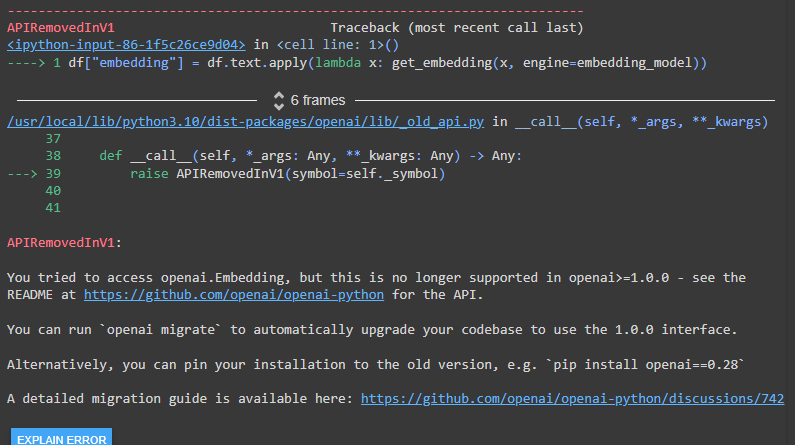  Embedding no longer supported, so going to revert to older version.


In [ ]:
pip install scikit-learn

In [ ]:
import os
import pandas as pd
import openai
import numpy as np
from ast import literal_eval
#from openai import OpenAI
from google.colab import userdata
import matplotlib.pyplot as plt
import urllib
import re

from google.colab import userdata
secret_value_0 = userdata.get('OPENAI_API_KEY')





In [ ]:
#practice query to assure that open ai is properly connected.

'''completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a Gorilla."},
    {"role": "user", "content": "Using Oohs and ahhs ask for a banana."}
  ]
)

print(completion.choices[0].message)'''

'completion = client.chat.completions.create(\n  model="gpt-3.5-turbo",\n  messages=[\n    {"role": "system", "content": "You are a Gorilla."},\n    {"role": "user", "content": "Using Oohs and ahhs ask for a banana."}\n  ]\n)\n\nprint(completion.choices[0].message)'

In [ ]:
#import of data that will be used to train model
#I decided to go with the raw file for this so I could run this code in any Jupyter notebook anywhere
#As I am switching computers, and downloading it each time makes no sense, so I will just pull it from
#Github.



data0= 'https://raw.githubusercontent.com/amilliongoals/Customer-Service-Query-AI/main/data/3rdpartyreturn.md'
data1 = 'https://raw.githubusercontent.com/amilliongoals/Customer-Service-Query-AI/main/data/Return%20Policy.md'
data2 = 'https://raw.githubusercontent.com/amilliongoals/Customer-Service-Query-AI/main/data/amzstylerturn.md'
data3 = 'https://raw.githubusercontent.com/amilliongoals/Customer-Service-Query-AI/main/data/fashion%20returns.md'
data4 = 'https://raw.githubusercontent.com/amilliongoals/Customer-Service-Query-AI/main/data/gift%20return%20w%20reciept.md'
data5 = 'https://raw.githubusercontent.com/amilliongoals/Customer-Service-Query-AI/main/data/gift%20return.md'
data6 ='https://raw.githubusercontent.com/amilliongoals/Customer-Service-Query-AI/main/data/globalreturn.md'
data7 = 'https://raw.githubusercontent.com/amilliongoals/Customer-Service-Query-AI/main/data/hub%20return.md'
data8 = 'https://raw.githubusercontent.com/amilliongoals/Customer-Service-Query-AI/main/data/internatonal%20returns.md'
data9 = 'https://raw.githubusercontent.com/amilliongoals/Customer-Service-Query-AI/main/data/mistakenreturns.md'
data10 = 'https://raw.githubusercontent.com/amilliongoals/Customer-Service-Query-AI/main/data/nonrefundable%20items.md'
data11 = 'https://raw.githubusercontent.com/amilliongoals/Customer-Service-Query-AI/main/data/return%20costs.md'
data12 = 'https://raw.githubusercontent.com/amilliongoals/Customer-Service-Query-AI/main/data/returncancel.md'

dataset = [data0,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12]
textfile=[0]*len(dataset)




In [ ]:
i=0
while i<len(dataset):
   textfile[i]=urllib.request.urlopen(dataset[i]).read()
   i=i+1

In [ ]:
print(textfile[2])

b"# Returning an Amazon Style Purchase - Amazon Customer Service\nYou can return most items purchased at an Amazon Style Store for a full refund within 30 days of purchase. To determine your return options for Amazon.com purchases, use our Online Return Center.\n\nExtended Returns Information\n----------------------------\n\nFor the 2022 Holiday Season, most of the items purchased between October 11 and December 25, 2022 can be returned until January 31, 2023.\n\nAmazon Style Returns Policy\n---------------------------\n\nItems purchased at an Amazon Style location can be returned within 30 days for a full refund, subject to our other listed return guidelines listed below.\n\n*   Products must be returned in new and unworn condition, with all original packaging and tags.\n*   Any products that are resized, altered, or otherwise damaged after purchase, won't be accepted for return.\n*   Gift Cards are not returnable (except as required by law)\n*   Gift recipients can return a gift with

In [ ]:
#textfile

https://monkeylearn.com/blog/text-cleaning/

https://medium.com/@pawan329/text-data-preprocessing-made-easy-steps-to-clean-text-data-using-python-81a138a0e0e3

https://machinelearningmastery.com/clean-text-machine-learning-python/


clean text info

https://spotintelligence.com/2023/09/18/top-20-essential-text-cleaning-techniques-practical-how-to-guide-in-python/


Noise Reduction & Data prep methods to apply

-Check for & remove html tags, punctuaion (I do want to do this)

-Standarization, convert all text to lower case (I don't want to do this, punctuation is a part of better responses)

-Tokenization - break text into words or tokens (I do want to do this)

-stopword removal (I don't want to do this, as to not potentially change context of convesational data) (we don't always want to - understand edgecases/use cases for it)
https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a#:~:text=We%20do%20not%20always%20remove,not%20remove%20the%20stop%20words.

-deduplication (things thare might be similar might be different enough, I will check for bias and then make adjustments from there)

-Noisy text reduction (typos, abbreviations, non standard language)

---



In [ ]:
text_df=pd.DataFrame(textfile)
text_df

,0
0,"b""# Returns to Third-Party Sellers - Amazon Cu..."
1,b'# About Our Returns Policies - Amazon Custom...
2,"b""# Returning an Amazon Style Purchase - Amazo..."
3,"b""# Free Returns on Fashion Items - Amazon Cus..."
4,b'# Return a Gift Using a Gift Receipt - Amazo...
5,"b""# Return a Gift - Amazon Customer Service\nT..."
6,"b""# Amazon Global Store Returns - Amazon Custo..."
7,"b""# Return an Item at an Amazon Hub Counter - ..."
8,"b""# International Returns - Amazon Customer Se..."
9,"b""# About Mistaken Returns to Amazon - Amazon ..."


In [ ]:
df= pd.DataFrame({"web-url":dataset, "text":textfile})
#df['web-url'] = df['web-url'].map(lambda x: x.lstrip('https://raw.githubusercontent.com/amilliongoals/Customer-Service-Query-AI/main').rstrip('.md'))

df['web-url'] = df['web-url'].str.replace('https://raw.githubusercontent.com/amilliongoals/Customer-Service-Query-AI/main/data/',"").str.replace('.md',"")
df

df['text']=df['text'].str.decode('utf-8')

<ipython-input-11-de03878b880d>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['web-url'] = df['web-url'].str.replace('https://raw.githubusercontent.com/amilliongoals/Customer-Service-Query-AI/main/data/',"").str.replace('.md',"")


In [ ]:


def clean_text(text):
  text = text.lower()
  text = text.replace("\n", " ")
  text = text.replace("-", "")
  text = text.replace("  ", " ")
  text = text.replace("   "," ")
  text = text.replace("*", "")
  text = text.replace("\\", "")
  text = text.replace(".com", "")
  text=  re.sub(r'http\S+', '', text)
  #text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text) #excessive
  return text


df['text']=df['text'].apply(clean_text)

df['text'][2]  #test to see the result with an excert from the df, scroll through different files to check for wasteful token sage


"# returning an amazon style purchase amazon customer service you can return most items purchased at an amazon style store for a full refund within 30 days of purchase. to determine your return options for amazon purchases, use our online return center. extended returns information  for the 2022 holiday season, most of the items purchased between october 11 and december 25, 2022 can be returned until january 31, 2023. amazon style returns policy  items purchased at an amazon style location can be returned within 30 days for a full refund, subject to our other listed return guidelines listed below.   products must be returned in new and unworn condition, with all original packaging and tags.   any products that are resized, altered, or otherwise damaged after purchase, won't be accepted for return.   gift cards are not returnable (except as required by law)   gift recipients can return a gift with the order number or printed gift receipt.   some returns made instore may be refunded as a

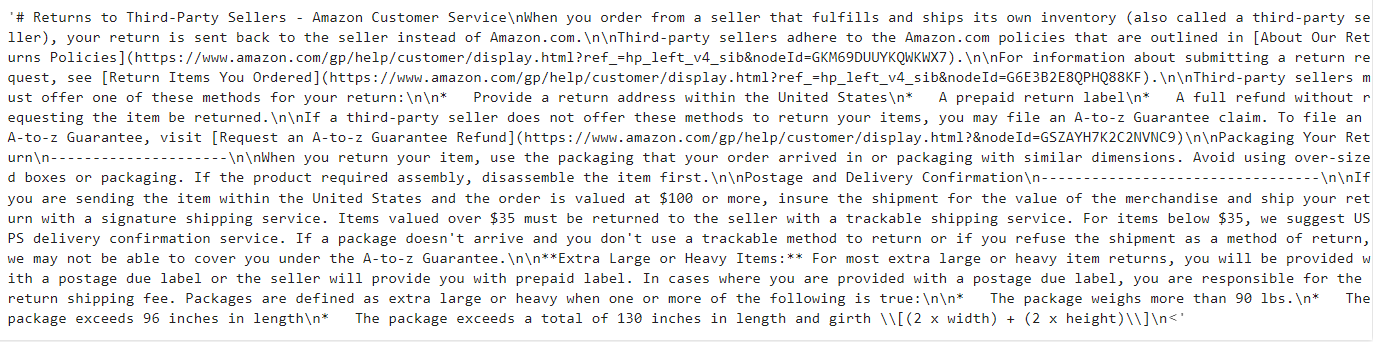

Different Tokenizers

Corpus - vocabulary we start with
splits - what the corpus starts with

General Tokenizer Features:

1) Word-based tokenizers (uses a dictionary for a language) and breaks each word into a token

2) Character-based tokenization  (less characters than word based catagories...) Out of vocabulary tokens are less frequent, allows us to see mispelled words. Characters has less information than a word... And processing can be harder.

3) Subword-based tokenization (what I will likely be using) breaks it into sub words (fast) and (est) from a library (dictionary)


Sub-word Tokenization Algorithms:


A) Byte-Pair Tokeniation (BPE algorithism) word compression that is great for tokenization. Breaks wors into word units. First splits each word into the characters it is composed of, lists all the letters that appear, then takes each two lettes that are next to eachother finding frequency of each pairs. Merges the pairs most frequent, then adds to vocabulary (set sof letters). Then rinse and repeat e.g., l -> l+e = le (most frequent) -> le+a (most frequent) -> lea+r (most frequent) -> e+r = er, then will repeat until vocab is at the size we want. Then merges them together.

B) WordPiece tokenization (algrorithim/strategy) breaks each word into thie peices where ## if it does not start the word. THen scores the pairs, and then like BPE adds to vocab the greatest frequency  score = freq score/ freq first element * freq of second element. Score all the pairs, then based on paris scores add to vocab, then reapply those added scores to their vocab just like BPE. Repeat until vocab is developed.

C) Unigram- start with large vocabulary and remove tokens (words/phrase/etc.) until we are at a desires size, we calcualte the loss based on a unigram level. We take out words and test how much loss is present. Then calcualte how much is lost by taking out specific words. This is that a text is a sequence of tokens which could be words or letters, or  something else... It assumes the occurance of each word is independent of its previous word.

1st iteration: estimate probability: the frequency of token / the over frequency of any token

Then for a word, we see all the tokenziation combinations that can form that word.

Then repeat this for each word, and measure each combination that uses each token.

Find the tokens that have the least impact (assuming there are multiple combinations to form same word).

2nd interation. Repeat process again. Then calcualte loss of all non-elementary units. Remove tokens that results in the least loss. Can do more than 1 item, but 10% of the tokens (bottom 10% loss, etc.) and reduce until our vocab is the size we want it.


1) NLTK (library) Functions:

       -Whitespace tokenization: splits at all white space cahracters

       -Punctuation-based tokeniztion: splits on whitespace and punctuation

       -TreebankWordTokenizer (default): looks for regular expressions from English text and breaks into tokens https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.treebank.TreebankWordTokenizer

       -TweetTokenizer: tokenization for tweets! Specifically for twitter to remove html code, handles, etc. and get the data we want.

       -MWETTokenizer: rule based, add-on tokenizer that breaks text into tokens, then regrouped into multi-word expressions making larger tokens


In [ ]:
pip install tiktoken


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.


https://github.com/openai/tiktoken

Tiktoken is a tokenizer from openai... I was originally exploring huggingface's tokenizers, but the performance difference makes this a clear winner. I may go back and use hugging face's documentation however to create my own tokenizer.  


Tiktoken is a BPE tokenizer which is a subcategory of Subword-based tokenization.




cl100k_base is being used, as I am using gpt-3.5-turbo

In [ ]:
import tiktoken

encoding= tiktoken.get_encoding("cl100k_base")
encoding_test="This is what I'm trialing my encoding on"
tokens_integer=encoding.encode(encoding_test)
tokens_integer

[2028, 374, 1148, 358, 2846, 2463, 6260, 856, 11418, 389]

In [ ]:
print(f"{len(tokens_integer)} is the number of tokens from the list")

10 is the number of tokens from the list


In [ ]:
tokens_string=[encoding.decode_single_token_bytes(token) for token in tokens_integer]
tokens_string

[b'This',
 b' is',
 b' what',
 b' I',
 b"'m",
 b' tri',
 b'aling',
 b' my',
 b' encoding',
 b' on']

https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/#


lambda function

Dataframe.assign() on a Single Column
Dataframe.assign() on Multiple Columns
Dataframe.apply() on a Single Row
Dataframe.apply() on Multiple Rows
Lambda Function on Multiple Rows and Columns Simultaneously

In [ ]:
#now apply to my dataframe & add column 'Token_#' that states the number of tokens it has.

df['Token_n']=df.text.apply(lambda x: len(encoding.encode(x)))

df['Tokens']=df.text.apply(lambda x: encoding.encode(x))
#lambda apply is on a single row, basically, this goes linearly through each row counting tokens in each.

df['decoded_Tokens']=df.Tokens.apply(lambda x: encoding.decode(x))
print(df)

token_sum = df['Token_n'].sum()
percent_util = df['Token_n'].sum() /4096 *100

print("\n\n",token_sum, 'out of 4096 tokens', percent_util,'% of tokens used')

if percent_util > 100:
  print("\nTry cleaning data more, if unable will handle in chunking :)")
else:
  print("\nTokens is within range")

  #removing urls in addition dropped my tokens by another 300 , .com phrase by another 300



                        web-url  \
0                3rdpartyreturn   
1               Return%20Policy   
2                 amzstylerturn   
3             fashion%20returns   
4   gift%20return%20w%20reciept   
5                 gift%20return   
6                  globalreturn   
7                  hub%20return   
8        internatonal%20returns   
9               mistakenreturns   
10        nonrefundable%20items   
11               return%20costs   
12                 returncancel   

                                                 text  Token_n  \
0   # returns to thirdparty sellers amazon custome...      436   
1   # about our returns policies amazon customer s...     3615   
2   # returning an amazon style purchase amazon cu...      400   
3   # free returns on fashion items amazon custome...      926   
4   # return a gift using a gift receipt amazon cu...       79   
5   # return a gift amazon customer service the re...      438   
6   # amazon global store returns amazon custom

GPT-3.5-turbo supports a context window of 4096 tokens — that means that input tokens + generated ( / completion) output tokens, cannot total more than 4096 without hitting an error.

So we 100% need to keep below this. If we assume a very safe margin of ~2000 tokens for the input prompt into gpt-3.5-turbo, leaving ~2000 tokens for conversation history and completion.

With this ~2000 token limit we may want to include five snippets of relevant information, meaning each snippet can be no more than 400 token long.


How that I have the token number for each file, I am going to want to chunk the tokens, or... combine like tokens from each of my files from my different data sets.


In [ ]:
  print(df['decoded_Tokens'][1])
  print(df['text'][1])

  #check for loss of data in encoding -> decoding process into tokens , repeat as I continue to slim the data set

# about our returns policies amazon customer service amazon and most sellers on amazon offer returns for items within 30 days of receipt of shipment.  amazon returns policy  items shipped from amazon, including amazon warehouse, can be returned within 30 days of delivery, with some exceptions:   for information about products that can't be returned, see [items that can't be returned](   to determine if a product sold by amazon has a longer return timeline, locate the product type below. if the product type isn't listed or doesn't state another returns time frame, our standard 30day return policy applies.   while most sellers offer a returns policy equivalent to amazon's, some seller returns policies may vary. if the seller's listing is eligible for amazon prime, it will be subject to the same return policies as items fulfilled by amazon that are outlined on this page. for more information about returning to thirdparty sellers, see [returns to thirdparty sellers](   for products purchas

In [ ]:
#method one
# prompt: combine all rows of text in one column into one text file
df['text'].to_csv('data.txt', sep='\t', index=True)

f= open("data.txt", "r")
new_text=print(f.read())


	text
0	# returns to thirdparty sellers amazon customer service when you order from a seller that fulfills and ships its own inventory (also called a thirdparty seller), your return is sent back to the seller instead of amazon. thirdparty sellers adhere to the amazon policies that are outlined in [about our returns policies]( for information about submitting a return request, see [return items you ordered]( thirdparty sellers must offer one of these methods for your return:   provide a return address within the united states   a prepaid return label   a full refund without requesting the item be returned. if a thirdparty seller does not offer these methods to return your items, you may file an atoz guarantee claim. to file an atoz guarantee, visit [request an atoz guarantee refund]( packaging your return  when you return your item, use the packaging that your order arrived in or packaging with similar dimensions. avoid using oversized boxes or packaging. if the product required assembl

In [ ]:
#method two
# prompt: combine all rows of text in one column into one text file

text = ""
for i in df['text']:
  text += i + "\n"
with open('text.txt', 'w') as f:
  f.write(text)
text

'# returns to thirdparty sellers amazon customer service when you order from a seller that fulfills and ships its own inventory (also called a thirdparty seller), your return is sent back to the seller instead of amazon. thirdparty sellers adhere to the amazon policies that are outlined in [about our returns policies]( for information about submitting a return request, see [return items you ordered]( thirdparty sellers must offer one of these methods for your return:   provide a return address within the united states   a prepaid return label   a full refund without requesting the item be returned. if a thirdparty seller does not offer these methods to return your items, you may file an atoz guarantee claim. to file an atoz guarantee, visit [request an atoz guarantee refund]( packaging your return  when you return your item, use the packaging that your order arrived in or packaging with similar dimensions. avoid using oversized boxes or packaging. if the product required assembly, disa

In [ ]:
!pip install mwclient
!pip install mwparserfromhell

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 855.8 kB/s eta 0:00:00


In [ ]:
# imports
import mwclient  # for downloading example Wikipedia articles
import mwparserfromhell  # for splitting Wikipedia articles into sections
import openai  # for generating embeddings
import pandas as pd  # for DataFrames to store article sections and embeddings
import re  # for cutting <ref> links out of Wikipedia articles
import tiktoken  # for counting tokens

# models
EMBEDDING_MODEL = "text-embedding-ada-002"
GPT_MODEL = "gpt-3.5-turbo"

https://github.com/openai/openai-cookbook/blob/cc776d05990961a15abc963ee1021a8db2da689b/examples/Embedding_Wikipedia_articles_for_search.ipynb

How to embed txt files

In [ ]:
#open ai functions to recursively split and chunk tokens

def halved_by_delimiter(string: str, delimiter: str = "\n") -> list[str, str]:
    """Split a string in two, on a delimiter, trying to balance tokens on each side."""
    chunks = string.split(delimiter)
    if len(chunks) == 1:
        return [string, ""]  # no delimiter found
    elif len(chunks) == 2:
        return chunks  # no need to search for halfway point
    else:
        total_tokens = num_tokens(string)
        halfway = total_tokens // 2
        best_diff = halfway
        for i, chunk in enumerate(chunks):
            left = delimiter.join(chunks[: i + 1])
            left_tokens = num_tokens(left)
            diff = abs(halfway - left_tokens)
            if diff >= best_diff:
                break
            else:
                best_diff = diff
        left = delimiter.join(chunks[:i])
        right = delimiter.join(chunks[i:])
        return [left, right]


def truncated_string(
    string: str,
    model: str,
    max_tokens: int,
    print_warning: bool = True,
) -> str:
    """Truncate a string to a maximum number of tokens."""
    encoding = tiktoken.encoding_for_model(model)
    encoded_string = encoding.encode(string)
    truncated_string = encoding.decode(encoded_string[:max_tokens])
    if print_warning and len(encoded_string) > max_tokens:
        print(f"Warning: Truncated string from {len(encoded_string)} tokens to {max_tokens} tokens.")
    return truncated_string


def split_strings_from_subsection(
    subsection: tuple[list[str], str],
    max_tokens: int = 1000,
    model: str = GPT_MODEL,
    max_recursion: int = 5,
) -> list[str]:
    """
    Split a subsection into a list of subsections, each with no more than max_tokens.
    Each subsection is a tuple of parent titles [H1, H2, ...] and text (str).
    """
    titles, text = subsection
    string = "\n\n".join(titles + [text])
    num_tokens_in_string = num_tokens(string)
    # if length is fine, return string
    if num_tokens_in_string <= max_tokens:
        return [string]
    # if recursion hasn't found a split after X iterations, just truncate
    elif max_recursion == 0:
        return [truncated_string(string, model=model, max_tokens=max_tokens)]
    # otherwise, split in half and recurse
    else:
        titles, text = subsection
        for delimiter in ["\n\n", "\n", ". "]:
            left, right = halved_by_delimiter(text, delimiter=delimiter)
            if left == "" or right == "":
                # if either half is empty, retry with a more fine-grained delimiter
                continue
            else:
                # recurse on each half
                results = []
                for half in [left, right]:
                    half_subsection = (titles, half)
                    half_strings = split_strings_from_subsection(
                        half_subsection,
                        max_tokens=max_tokens,
                        model=model,
                        max_recursion=max_recursion - 1,
                    )
                    results.extend(half_strings)
                return results
    # otherwise no split was found, so just truncate (should be very rare)
    return [truncated_string(string, model=model, max_tokens=max_tokens)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['text'] = df['text'].astype("string")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   web-url         13 non-null     object
 1   text            13 non-null     string
 2   Token_n         13 non-null     int64 
 3   Tokens          13 non-null     object
 4   decoded_Tokens  13 non-null     object
dtypes: int64(1), object(3), string(1)
memory usage: 648.0+ bytes


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#this splits long strings of text into smaller chunks at a limited token size

def string_splitter_5000(text:str, max_tokens:int):
  #I will feeed my string df['text'] and token max MAX TOKEN into this function
  #I want to first define sentences as a text split
  sentences= text.split(". ")
  #create a list to store my chunks
  chunks= []
  chunk=""
  #defining chunk as a string
  n_chunk_tokens= 0  #counting my chunk
  #looking at the sentences I broke apart from my text file
  for sentence in sentences:
        n_sentence_tokens = len(encoding.encode(" "+ sentence))
        #number of sentence tokens = the length of the encoding of the sentences in sentence
        if n_sentence_tokens > max_tokens:
          print("bad sentence:", n_sentence_tokens, "\n", sentence)
        #if the number of tokens as a result of encoding the sentences
        # goes beyond my max print that is too large... which is weird, it means a sentence is super long
        #this model does nothing really to address this lol

#if the total number of tokens (from sentence & chunk tokens) > max, then add a chunk counter
#to chunks, and reset the number of chunk tokens
        if n_sentence_tokens + n_chunk_tokens > max_tokens:
          chunks.append(chunk) #add the chunk 'text' to the chunk list
          chunk="" #clear the chunk which is the text
          n_chunk_tokens = 0  #clear excess count

        chunk +=" " + sentence #the chunk worked with is euqal to a space and the last sentence split
        n_chunk_tokens=len(encoding.encode(chunk))
        #the number of chunk tokens is the length of all of the chunks(sentences) pulled from the tokenizer

  if chunk:
    chunks.append(chunk)
#if we have to add a chunk to the chunks list (ove our token limit), we will return the list that has all the chunks in it
#in theoery this should a growing list as we overflow
  print(chunks)
  return chunks


#we will set this to max_tokens for our string :) This will cap our tokens, with all un-tokenized chunks
#being caputred in this 'chunks' list




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#we are now going to do the embedding process

embedding_texts=[]  #make an empty array called embedding texts

MAX_TOKENS = 600
#idx, row in df.interrows pretty much pulls out one column and all of its 'rows' when printing
#row['column name'], this is looking at our df where we have # of tokens and all the text
for idx, row in df.iterrows():
  #print(row.text,'\n')
  if row.Token_n > MAX_TOKENS:  #this is looking at our Token_n row in df
    #print(row.Token_n)
    #basically, a row is a document of text, so if the number of tokens in that row
    #exceeds the amount of tokens allowed by default, then we are going to engage
    #in splitting to try and reduce the number of tokens by using our string_splitter_5000 function
    splitted_string = string_splitter_5000(row.text, max_tokens= MAX_TOKENS )
                                          #this only works becuase this is from idx,row df.iterrows
                                          #so when we say row.text, it knows its looking at df
                                          #and specifically the column text, but pulling the data
                                          #from the each row
    #print(t in splitted_string)

    for t in splitted_string: #t is a tokenized version of text in the splitted string row being analyzed
        embedding_texts.append(t) #indents were wrong ...
  else: #if the individual file has less tokens then the max lim, dont do anything and add it.
        embedding_texts.append(row.text) #any time a row doesn't need to be tokenized it is just added as is. This shouldn't happen in this case though.




## This just splits the text... but it doesn't reduce token size overal

[" # about our returns policies amazon customer service amazon and most sellers on amazon offer returns for items within 30 days of receipt of shipment  amazon returns policy  items shipped from amazon, including amazon warehouse, can be returned within 30 days of delivery, with some exceptions:   for information about products that can't be returned, see [items that can't be returned](   to determine if a product sold by amazon has a longer return timeline, locate the product type below if the product type isn't listed or doesn't state another returns time frame, our standard 30day return policy applies   while most sellers offer a returns policy equivalent to amazon's, some seller returns policies may vary if the seller's listing is eligible for amazon prime, it will be subject to the same return policies as items fulfilled by amazon that are outlined on this page for more information about returning to thirdparty sellers, see [returns to thirdparty sellers](   for products purchased

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for t in embedding_texts:
  print(t)

  #print the tokenized text that is stored in the embedding_text array out


# returns to thirdparty sellers amazon customer service when you order from a seller that fulfills and ships its own inventory (also called a thirdparty seller), your return is sent back to the seller instead of amazon. thirdparty sellers adhere to the amazon policies that are outlined in [about our returns policies]( for information about submitting a return request, see [return items you ordered]( thirdparty sellers must offer one of these methods for your return:   provide a return address within the united states   a prepaid return label   a full refund without requesting the item be returned. if a thirdparty seller does not offer these methods to return your items, you may file an atoz guarantee claim. to file an atoz guarantee, visit [request an atoz guarantee refund]( packaging your return  when you return your item, use the packaging that your order arrived in or packaging with similar dimensions. avoid using oversized boxes or packaging. if the product required assembly, disas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fine tuning with json file :)

https://github.com/openai/openai-cookbook/blob/main/examples/data/toy_chat_fine_tuning.jsonl

https://github.com/openai/openai-cookbook/blob/main/examples/Chat_finetuning_data_prep.ipynb


In [ ]:
total_tokens = 0
for t in embedding_texts:
  total_tokens += len(encoding.encode(t))

print("Total tokens:", total_tokens)

Total tokens: 7496


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


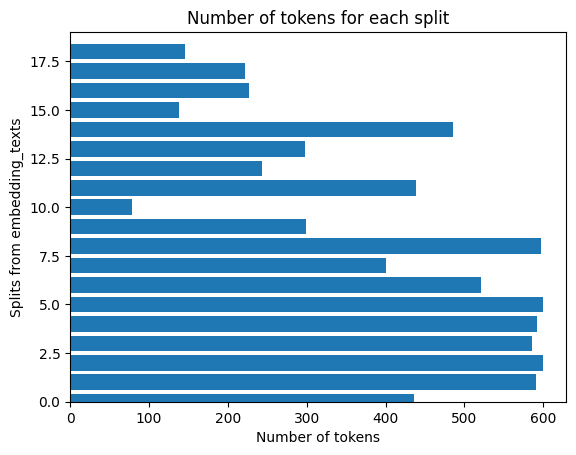

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes object.
fig, ax = plt.subplots()

# Plot the number of tokens for each part of the `embedding_texts` array.
ax.barh(range(len(embedding_texts)), [len(encoding.encode(t)) for t in embedding_texts])

# Set the title and labels for the plot.
ax.set_title("Number of tokens for each split")
ax.set_xlabel("Number of tokens")
ax.set_ylabel("Splits from embedding_texts")

# Set the y-axis scale to be 1 to 18.
ax.set_ylim(0, 19)

# Show the plot.
plt.show()

https://cookbook.openai.com/examples/get_embeddings_from_dataset

In [ ]:
#!pip install scikit-learn
#!pip install openai[embeddings]
!pip install utils

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import tiktoken

# embedding model parameters
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
max_tokens = 8000  # the maximum for text-embedding-ada-002 is 8191



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


get_embedding is missing and the library is not loadable, so I will have to recreate the feature

get_embedding from that library here.


In [ ]:
#get_embedding from https://github.com/openai/openai-python/blob/release-v0.28.0/openai/embeddings_utils.py




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import textwrap as tr
from typing import List, Optional

import matplotlib.pyplot as plt
import plotly.express as px
from scipy import spatial
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import average_precision_score, precision_recall_curve
from tenacity import retry, stop_after_attempt, wait_random_exponential

import openai
#from openai.datalib.numpy_helper import numpy as np
#from openai.datalib.pandas_helper import pandas as pd
#datalib shouldn't matter, but if it does I will need to recreate what was done there on
#a need basis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_embedding(text: str, engine="text-similarity-davinci-001", **kwargs) -> List[float]:

    # replace newlines, which can negatively affect performance.
    text = text.replace("\n", " ")

    return openai.Embedding.create(input=[text], engine=engine, **kwargs)["data"][0]["embedding"]




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Code to run once get_embedding works again.

In [ ]:
from google.colab import userdata
key = userdata.get('OPENAI_API_KEY')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
openai.api_key = key


df["embedding"] = df.text.apply(lambda x: get_embedding(x, engine=embedding_model))


df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,web-url,text,Token_n,Tokens,decoded_Tokens,embedding
0,3rdpartyreturn,# returns to thirdparty sellers amazon custome...,436,"[2, 4780, 311, 4948, 34057, 37249, 39516, 6130...",# returns to thirdparty sellers amazon custome...,"[0.008286071941256523, 0.005539869889616966, -..."
1,Return%20Policy,# about our returns policies amazon customer s...,3615,"[2, 922, 1057, 4780, 10396, 39516, 6130, 2532,...",# about our returns policies amazon customer s...,"[0.0013496639439836144, -0.004098320379853249,..."
2,amzstylerturn,# returning an amazon style purchase amazon cu...,400,"[2, 13758, 459, 39516, 1742, 7782, 39516, 6130...",# returning an amazon style purchase amazon cu...,"[-0.0031497436575591564, -0.001763074309565127..."
3,fashion%20returns,# free returns on fashion items amazon custome...,926,"[2, 1949, 4780, 389, 11401, 3673, 39516, 6130,...",# free returns on fashion items amazon custome...,"[-0.004479630850255489, -0.010594840161502361,..."
4,gift%20return%20w%20reciept,# return a gift using a gift receipt amazon cu...,79,"[2, 471, 264, 8352, 1701, 264, 8352, 23383, 39...",# return a gift using a gift receipt amazon cu...,"[-0.02093796618282795, 0.002265937626361847, -..."
5,gift%20return,# return a gift amazon customer service the re...,438,"[2, 471, 264, 8352, 39516, 6130, 2532, 279, 47...",# return a gift amazon customer service the re...,"[-0.01751926727592945, 0.00248383404687047, -0..."
6,globalreturn,# amazon global store returns amazon customer ...,243,"[2, 39516, 3728, 3637, 4780, 39516, 6130, 2532...",# amazon global store returns amazon customer ...,"[-0.006144009996205568, -0.0007696232642047107..."
7,hub%20return,# return an item at an amazon hub counter amaz...,298,"[2, 471, 459, 1537, 520, 459, 39516, 19240, 56...",# return an item at an amazon hub counter amaz...,"[-0.0008071695920079947, 0.003612808184698224,..."
8,internatonal%20returns,# international returns amazon customer servic...,486,"[2, 6625, 4780, 39516, 6130, 2532, 499, 649, 4...",# international returns amazon customer servic...,"[-0.005208231508731842, -0.0013036703458055854..."
9,mistakenreturns,# about mistaken returns to amazon amazon cust...,138,"[2, 922, 37104, 4780, 311, 39516, 39516, 6130,...",# about mistaken returns to amazon amazon cust...,"[-0.0058820839039981365, -0.011563300155103207..."


https://github.com/openai/openai-cookbook/blob/main/examples/Embedding_Wikipedia_articles_for_search.ipynb

bumping for reference

In [ ]:
df=df[['text', 'embedding','Token_n']].copy()


df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,embedding,Token_n
0,# returns to thirdparty sellers amazon custome...,"[0.008286071941256523, 0.005539869889616966, -...",436
1,# about our returns policies amazon customer s...,"[0.0013496639439836144, -0.004098320379853249,...",3615
2,# returning an amazon style purchase amazon cu...,"[-0.0031497436575591564, -0.001763074309565127...",400
3,# free returns on fashion items amazon custome...,"[-0.004479630850255489, -0.010594840161502361,...",926
4,# return a gift using a gift receipt amazon cu...,"[-0.02093796618282795, 0.002265937626361847, -...",79
5,# return a gift amazon customer service the re...,"[-0.01751926727592945, 0.00248383404687047, -0...",438
6,# amazon global store returns amazon customer ...,"[-0.006144009996205568, -0.0007696232642047107...",243
7,# return an item at an amazon hub counter amaz...,"[-0.0008071695920079947, 0.003612808184698224,...",298
8,# international returns amazon customer servic...,"[-0.005208231508731842, -0.0013036703458055854...",486
9,# about mistaken returns to amazon amazon cust...,"[-0.0058820839039981365, -0.011563300155103207...",138


In [ ]:
# search function
def strings_ranked_by_relatedness(
    query: str,
    df: pd.DataFrame,
    relatedness_fn=lambda x, y: 1 - spatial.distance.cosine(x, y),
    top_n: int = 100
) -> tuple[list[str], list[float]]:
    """Returns a list of strings and relatednesses, sorted from most related to least."""
    query_embedding_response = openai.Embedding.create(
        model=EMBEDDING_MODEL,
        input=query,
    )
    query_embedding = query_embedding_response["data"][0]["embedding"]
    strings_and_relatednesses = [
        (row["text"], relatedness_fn(query_embedding, row["embedding"]))
        for i, row in df.iterrows()
    ]
    strings_and_relatednesses.sort(key=lambda x: x[1], reverse=True)
    strings, relatednesses = zip(*strings_and_relatednesses)
    return strings[:top_n], relatednesses[:top_n]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# examples
strings, relatednesses = strings_ranked_by_relatedness("curling gold medal", df, top_n=5)
for string, relatedness in zip(strings, relatednesses):
    print(f"{relatedness=:.3f}")
    display(string)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


relatedness=0.678


"# free returns on fashion items amazon customer service we offer free returns on some fashion items including clothes, shoes, handbags, jewelry, and watches. look for free returns next to the price to confirm that the item qualifies for free returns. extended returns information  for the 2022 holiday season, most of the items purchased between october 11 and december 25, 2022 can be returned until january 31, 2023. free returns on eligible fashion products  if you're not satisfied, you can return eligible products within 30 days of receipt for a full refund, in accordance with our [returns policy]( no minimum purchase is required to receive free returns. to return an item, please visit our [online return center]( amazon will provide a printable prepaid return label and pay for the return delivery costs if the item was dispatched by amazon (‘fulfilled by amazon’). in case of sellerfulfilled orders, either amazon issues a prepaid return labels on the seller's behalf or the seller will a

relatedness=0.675


"# about mistaken returns to amazon amazon customer service ensure you send the correct and complete item when making a return. the correct item must be returned to receive a refund. amazon does not store items mistakenly sent to us and instead donates, or recycles them, when appropriate and possible. if you accidentally sent the wrong item to amazon, contact [customer service]( as soon as possible. we cannot guarantee your item will be found, and no compensation is provided for incorrect items sent to amazon. you may be interested in...   [items that you can't return](   [return items you ordered](   [find a missing item from your package](   [refunds and exchanges]( "

relatedness=0.675


"# return a gift amazon customer service the returns center allows gift recipients to return items marked as a gift at the time of purchase. important note: before starting your return process, please be aware that gift items valued at more than $2000 can only be refunded to the original payment method of the purchaser of the gift. exchanges & replacements if you received a gift and need an exchange or replacement, you'll need to return the gift and place a new order. if you’re the gift giver, you can request a replacement in your orders how to return a gift: return a gift with or without gift receipt to start a gift return you will need your order number. you can find your 17digit order number on your packing slip that came with your item. you can also find it on the digital gift receipt we emailed you. if you can't locate the order number, you can ask the gift giver for details. things to consider before returning a gift a returned item must be in the same condition in which it was r

relatedness=0.674


"# international returns amazon customer service you can return your package using a label from your orders. need to return an item? go to returns  you can return items fulfilled by amazon within 30 days of receipt of delivery in your orders. for information on how to return an item, go to [return items you ordered]( for damaged, defective, or broken items, visit [replace a damaged, defective, or broken item]( international return methods  amazon offers you a variety of ways to return your item fulfilled by amazon:   ups drop off:   customers shipping from amazon to canada may have the option to return their purchase using a prepaid ups dropoff label. find a convenient ups dropoff location at [   dhl express drop off:   dropoff services at convenient locations (available in select countries). find a dhl dropoff location at [   dhl express pickup:   pickup services at the location, time, and place most convenient for you (available in select countries).   return label provided at your o

relatedness=0.672


'# return a gift using a gift receipt amazon customer service skip to main content you can return a gift using a gift receipt. we currently only offer this feature on mobile devices. to return a gift using a gift receipt:   visit the website link on the gift receipt.   follow the instructions to complete your return if you have any issues using a gift receipt, visit [return a gift]( '

https://platform.openai.com/docs/tutorials/web-qa-embeddings

In [ ]:
#manual port of distances_from_embedding
def distances_from_embeddings(
    query_embedding: List[float],
    embeddings: List[List[float]],
    distance_metric="cosine",
) -> List[List]:
    """Return the distances between a query embedding and a list of embeddings."""
    distance_metrics = {
        "cosine": spatial.distance.cosine,
        "L1": spatial.distance.cityblock,
        "L2": spatial.distance.euclidean,
        "Linf": spatial.distance.chebyshev,
    }
    distances = [
        distance_metrics[distance_metric](query_embedding, embedding)
        for embedding in embeddings
    ]
    return distances

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


https://github.com/openai/openai-cookbook/blob/main/examples/Question_answering_using_embeddings.ipynb

In [ ]:
def create_context(
    question, df, max_len=1800, size="ada"
):
    """
    Create a context for a question by finding the most similar context from the dataframe
    """

    # Get the embeddings for the question
    q_embeddings = openai.Embedding.create(input=question, engine='text-embedding-ada-002')['data'][0]['embedding']

    # Get the distances from the embeddings
    df['distances'] = distances_from_embeddings(q_embeddings, df['embedding'].values, distance_metric='cosine')
    #df['distances'] = distances_from_embeddings(q_embeddings, df['text'].values, distance_metric='cosine')

    returns = []
    cur_len = 0

    # Sort by distance and add the text to the context until the context is too long
    for i, row in df.sort_values('distances', ascending=True).iterrows():

        # Add the length of the text to the current length
        cur_len += row['Token_n'] + 4

        # If the context is too long, break
        if cur_len > max_len:
            break

        # Else add it to the text that is being returned
        returns.append(row["text"])

    # Return the context
    return "\n\n###\n\n".join(returns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def answer_question(df,
    model="text-davinci-003",
    question="Am I allowed to publish model outputs to Twitter, without a human review?",
    max_len=1800,
    size="ada",
    debug=False,
    max_tokens=150,
    stop_sequence=None
):
    """
    Answer a question based on the most similar context from the dataframe texts
    """
    context = create_context(
        question,
        df,
        max_len=max_len,
        size=size,
    )
    # If debug, print the raw model response
    if debug:
        print("Context:\n" + context)
        print("\n\n")

    try:
        # Create a completions using the question and context
        response = openai.Completion.create(
            prompt=f"Answer the question based on the context below as a amazon customer returns represantatitive if you are low confidence, say \"I don't know\"\n\nContext: {context}\n\n---\n\nQuestion: {question}\nAnswer:",
            temperature=0,
            max_tokens=max_tokens,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=stop_sequence,
            model=model,
        )
        return response["choices"][0]["text"].strip()
    except Exception as e:
        print(e)
        return ""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,embedding,Token_n
0,# returns to thirdparty sellers amazon custome...,"[0.008286071941256523, 0.005539869889616966, -...",436
1,# about our returns policies amazon customer s...,"[0.0013496639439836144, -0.004098320379853249,...",3615
2,# returning an amazon style purchase amazon cu...,"[-0.0031497436575591564, -0.001763074309565127...",400
3,# free returns on fashion items amazon custome...,"[-0.004479630850255489, -0.010594840161502361,...",926
4,# return a gift using a gift receipt amazon cu...,"[-0.02093796618282795, 0.002265937626361847, -...",79
5,# return a gift amazon customer service the re...,"[-0.01751926727592945, 0.00248383404687047, -0...",438
6,# amazon global store returns amazon customer ...,"[-0.006144009996205568, -0.0007696232642047107...",243
7,# return an item at an amazon hub counter amaz...,"[-0.0008071695920079947, 0.003612808184698224,...",298
8,# international returns amazon customer servic...,"[-0.005208231508731842, -0.0013036703458055854...",486
9,# about mistaken returns to amazon amazon cust...,"[-0.0058820839039981365, -0.011563300155103207...",138


In [ ]:
answer_question(df, model="gpt-3.5-turbo-instruct", question="what is the return policy for fashion clothes?")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'You can return most items purchased at an Amazon Style store for a full refund within 30 days of purchase.'

In [ ]:
answer_question(df, model="gpt-3.5-turbo-instruct", question="What is the policy to return furniture?")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"I don't know."

In [ ]:
answer_question(df, model="gpt-3.5-turbo-instruct", question="What should I do if I want to return an Item?")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'To return an item, go to "Your Orders" and find the requested return. Then, choose "Return and Refund Status" next to the return authorization and select "Cancel This Return." If you requested a pickup for your return, you can ignore the pickup attempts or contact the carrier to cancel the pickup.'